In [1]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import json
import copy
import numpy as np
from scipy.stats import levene
import json
import pathlib
current_file = '/Users/matin/Downloads/testProjs/MSC_M/scripts'
sys.path.insert(0,current_file)
dir_to_dirs = os.path.join(current_file,'..')
sys.path.insert(0,dir_to_dirs)
from dirs import dir_to_MSC_osteogenesis
sys.path.insert(0,dir_to_MSC_osteogenesis)
import parameters 
from all_runs_posteriors_dispesity import determine_title
from posteriors_dispersity import relabel,relabel_description

plt.rcParams["font.family"] = "serif"
plt.style.use('seaborn-deep')
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

plt.rcParams["mathtext.default"]='rm'
plt.rcParams['mathtext.fontset'] = 'stixsans'
# del matplotlib.font_manager.weight_dict['roman']
matplotlib.font_manager._rebuild()
%config IPCompleter.greedy=True

In [2]:
class settings:
    results_folder = os.path.join(dir_to_dirs,'results')
    PTTSs_file =  'PTTSs.json'
    contributed_errors = 'contributed_errors.json'

    axis_font = {'fontname':'Times New Roman', 'size':'25'}
    legend_font = { 'family':'Times New Roman','size':'24'}
    # colors = ['indigo' , 'darkred', 'olive','royalblue','red']
    fig_size = (10,11)
    barheight = .7
    linewidth = 1
    title_font = { 'family':'Times New Roman','size':'25'}
    error_font = { 'family':'Times New Roman','size':'22'}
    colors = ['indigo' , 'darkred', 'olive','royalblue','red','blue']

In [3]:
def remove_params(params): # get rid of this parameters
    if 'a_Chen_2018_ALP' in params:
        del params['a_Chen_2018_ALP']
    if 'a_Chen_2018_ARS' in params:
        del params['a_Chen_2018_ARS']
    if 'a_Valles_2020_ALP' in params:
        del params['a_Valles_2020_ALP']
    if 'a_Valles_2020_ARS' in params:
        del params['a_Valles_2020_ARS']
    if 'a_Qiao_2021_ALP' in params:
        del params['a_Qiao_2021_ALP']
    if 'a_Ber_2016_OC' in params:
        del params['a_Ber_2016_OC']
    if 'a_Ber_2016_ALP' in params:
        del params['a_Ber_2016_ALP']
    return params
def add_missing_params(PTTSs_studies,free_params_all):
    PTTSs_studies_adj ={}
    for study,PTTS in PTTSs_studies.items():
        PTTSs_adj = {}
        for key in free_params_all.keys():
            if key in PTTS.keys():
                PTTSs_adj[key] = PTTS[key]
            else:
                PTTSs_adj[key] = 0
        PTTSs_studies_adj[study]=PTTSs_adj
    return PTTSs_studies_adj 
# def adjust_PPTS(PPTSs_studies):
#     PPTSs_studies_adj = {}
#     for study,PPTSs in PPTSs_studies.items():
#         #// make them over 1
#         adj_PPTSs = {}
#         for key,value in PPTSs.items():
# #             if key == 'ALP_0' or key == 'ALP_M_n':
# #                 value/=2
#             adj_PPTSs[key] = value+1
#         #// make it logaritmic
#         log_PTTSs = {}
#         for key,value in adj_PPTSs.items():
#             log_PTTSs[key] = np.log10(value)
#         #// normalize
#         norm_PPTSs = {}
#         for key,value in log_PTTSs.items():
#             norm_PPTSs[key] = value/max(log_PTTSs.values())
#         final_data = norm_PPTSs
#         PPTSs_studies_adj[study] = final_data
#     return PPTSs_studies_adj
def adjust_PPTS(PPTSs_studies):
    PPTSs_studies_adj = {}
    top_n = 5
    best_score = 5
    for study,PPTSs in PPTSs_studies.items():
        #// make them over 1
        top_PPTSs  = {}
        ii = 0
        for ii in range(top_n):
            max_value = max(PPTSs.values())
            max_key = list(PPTSs.keys())[list(PPTSs.values()).index(max_value)]
            top_PPTSs[max_key] = best_score-ii
            del PPTSs[max_key]
        PPTSs_studies_adj[study] = top_PPTSs
    return PPTSs_studies_adj

In [4]:

with open(os.path.join(settings.results_folder,settings.PTTSs_file)) as ff:
    PTTSs_studies_original= json.load(ff)

with open(os.path.join(settings.results_folder,settings.contributed_errors)) as ff:
    contributed_errors_original= json.load(ff)
    
free_params_all_edited = remove_params(parameters.free_params_all)

PTTSs_studies = {}
for study,PTTSs in PTTSs_studies_original.items():
    PTTSs_studies[study] = remove_params(PTTSs)
contributed_errors = {}
for study,item in contributed_errors_original.items():
    contributed_errors[study] = remove_params(item)
PTTSs_studies = adjust_PPTS(PTTSs_studies)
PTTSs_studies = add_missing_params(PTTSs_studies = PTTSs_studies,free_params_all=free_params_all_edited )


<Figure size 432x288 with 0 Axes>

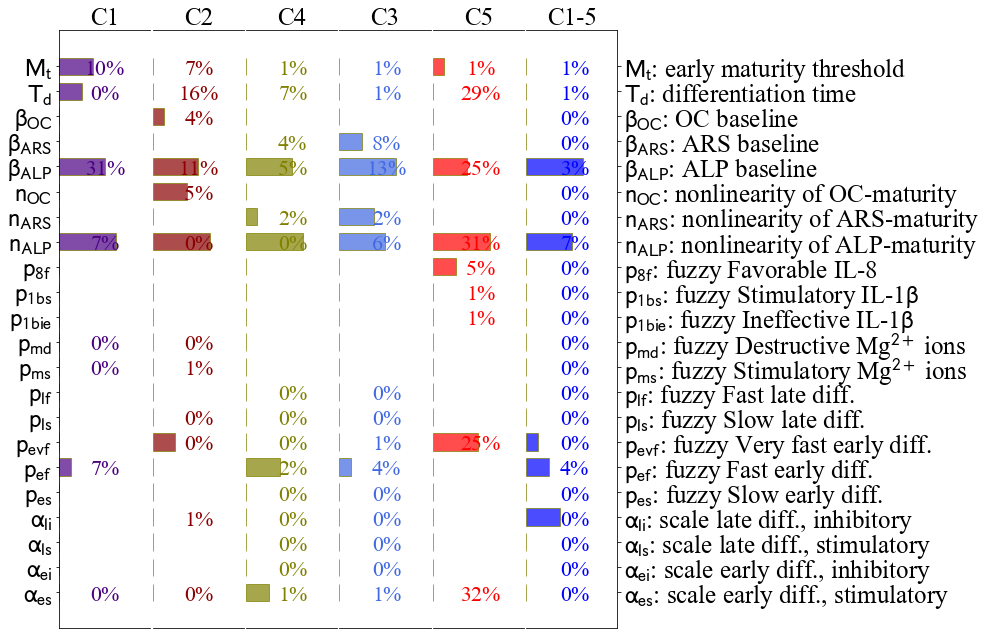

In [5]:

# plot sensitity
fig = plt.figure()
f, axes = plt.subplots(1, 6,figsize=settings.fig_size, gridspec_kw={'width_ratios': [1,1,1,1,1,1],'wspace':0.025})
def write_errors(labels,errors,offset,PTTSs,color):
    j = 0
    c1 = 8
    c2 = 0.25
    for label in labels:
        if label in errors:
#             plt.text(i*c1+i*c2-40+PTTSs[label],j-.5,str(errors[label])+'%',**settings.error_font,
#                 horizontalalignment='center',
#                 verticalalignment='bottom',color=color)
            plt.text(i*c1+i*c2-37,j-.5,str(errors[label])+'%',**settings.error_font,
                horizontalalignment='center',
                verticalalignment='bottom',color=color)
        j+=1

# plot sensitity
i = 0
for study,PTTSs in PTTSs_studies.items():
    PTTSs_values = list(PTTSs.values())
    original_labels = list(PTTSs.keys())
    adj_lables = relabel(original_labels)

    axes[i].barh(adj_lables,PTTSs_values,alpha = 0.7,color=settings.colors[i],height=settings.barheight,edgecolor='olive',
                 linewidth=settings.linewidth)
    errors = contributed_errors[study]
#     if study == 'Qiao_IL8_IL1b':
#         print('errors',errors)
#         print('\n')
#         for jj in range(len(original_labels)):
#             if PTTSs_values[jj]!=0:
#                 print(original_labels[jj],PTTSs_values[jj])
    write_errors(labels = original_labels,errors = errors,offset = i,PTTSs=PTTSs,color=settings.colors[i])
    axes[i].set_xlim([0,8])
    axes[i].set_xticks([0,0.5,1])
    # axes[i].set_title(tag,y=1.01,**title_font)
    axes[i].set_xticks([], [])
    # axes[i].set_ylim([-.5,19.5])
    if i == 5:
        axes[i].yaxis.set_label_position("right")
        axes[i].yaxis.tick_right()

    else:
        right_edge = axes[i].spines["right"]
        right_edge.set_visible(False)

    if i == 0:
        pass
    else:
        left_edge = axes[i].spines["left"]
        left_edge.set_visible(False)
        axes[i].set_yticks([], [])
    axes[i].set_title(determine_title(study),fontdict =settings.title_font)
#     axes[i].set_title(study,fontdict =settings.title_font,fontweight='bold')

    i+=1

plt.yticks([(i) for i in range(len(free_params_all_edited.keys()))], relabel_description(free_params_all_edited.keys()),rotation=0,fontweight='normal')
# ax.set_xlim([-.25,2.25])
for ax in axes:
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname(settings.axis_font['fontname'])
        label.set_fontsize(float(settings.axis_font['size']))
# plt.text(-18,-3, "Relative values between 0 and 5",**settings.title_font,
#     horizontalalignment='center',
#     verticalalignment='bottom')
plt.savefig(os.path.join(settings.results_folder,"SA.svg"),bbox_inches="tight")
